In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/bank.csv')
data.shape

(11162, 17)

In [ ]:
#data sample
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.isnull().mean()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

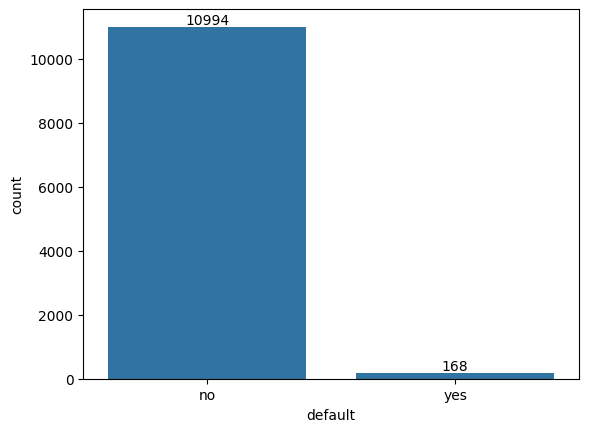

In [ ]:
ab=sns.countplot(data,x='default')
ab.bar_label(ab.containers[0])
plt.show()

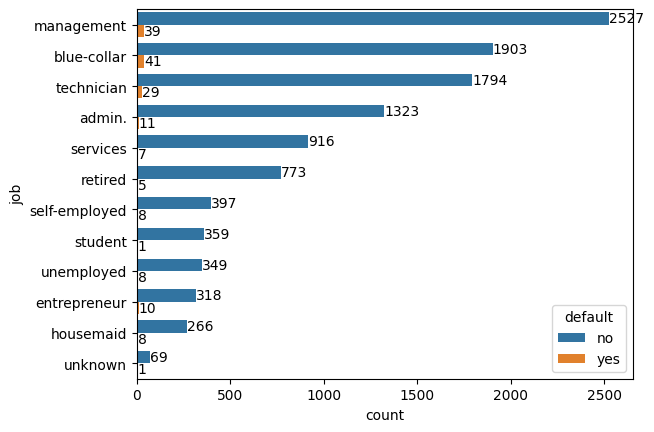

In [ ]:
ab=sns.countplot(data,y='job',hue='default',order=data['job'].value_counts().index)
ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame containing the dataset
encoder = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'O':  # Checking if the column type is object (categorical)
        data[col] = encoder.fit_transform(data[col])

# Now 'data' contains label encoded categorical columns


In [ ]:
#data sample after encoding
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
x=data.drop('default',axis=1)
y=data['default']

In [ ]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#decision tree algorithm

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42,max_depth=4)
model.fit(x_train,y_train)
train_score=model.score(x_train,y_train)
print(train_score)

0.9862246612162616
